In [1]:
import pandas as pd
from pandas import DataFrame
import os.path
import matplotlib.pyplot as plt
from pylab import *
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [16]:
us_zip_df = pd.read_csv('data/uszips.csv')
us_zip_df = DataFrame(us_zip_df)
us_zip_df = us_zip_df[['zip', 'state_id', 'population']]

In [17]:
us_zip_df = pd.read_csv('data/uszips.csv')
us_zip_df = DataFrame(us_zip_df)
us_zip_df = us_zip_df[['zip', 'state_id', 'population', 'density']]

us_zip_df_ny = us_zip_df[us_zip_df['state_id'] == 'NY']
us_zip_df_ny = us_zip_df_ny[['zip', 'population', 'density']]
us_zip_df_ny = us_zip_df_ny.rename(columns={'zip': 'ZIP Code'})

us_zip_df_tx = us_zip_df[us_zip_df['state_id'] == 'TX']
us_zip_df_tx = us_zip_df_tx[['zip', 'population']]
us_zip_df_tx = us_zip_df_tx.rename(columns={'zip': 'ZIP Code'})
us_zip_df_tx = us_zip_df_tx.fillna(0, inplace=True)

us_zip_df_wa = us_zip_df[us_zip_df['state_id'] == 'WA']
us_zip_df_wa = us_zip_df_wa[['zip', 'population']]
us_zip_df_wa = us_zip_df_wa.rename(columns={'zip': 'ZIP Code'})

us_zip_df_wa = us_zip_df_wa.fillna(0, inplace=True)

In [18]:
us_zip_df_ny['area'] = us_zip_df_ny['population'] / us_zip_df['density']
us_zip_df_ny

,ZIP Code,population,density,area
1839,6390,61.0,5.8,10.517241
2583,10001,25026.0,15489.3,1.615696
2584,10002,74363.0,34916.7,2.129726
2585,10003,54671.0,36928.8,1.480443
2586,10004,3310.0,2805.2,1.179952
...,...,...,...,...
4403,14898,1772.0,11.2,158.214286
4404,14901,15581.0,181.2,85.987859
4405,14903,7186.0,128.2,56.053042
4406,14904,15109.0,904.6,16.702410


In [19]:
ev_station_data = pd.read_csv('data/ev_stations_v1.csv')
ev_station_data = DataFrame(ev_station_data)

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
# ev_station_data = ev_station_data[ev_station_data['Access Code'] == 'private']
ev_station_data.head(10)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ELEC,State Capitol Parking Garage,1303 10th St,At 12th and N St,Sacramento,CA,95814,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ELEC,LADWP - Harbor Generating Station,161 N Island Ave,At B St,Wilmington,CA,90744,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ELEC,LADWP - Sylmar West,13201 Sepulveda Blvd,NaN,Sylmar,CA,91342,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ELEC,LADWP - EV Service Center,1630 N Main St,NaN,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ELEC,LADWP - Fairfax Center,2311 S Fairfax Ave,NaN,Los Angeles,CA,90016,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def ev_station_count_df(file,state):
    """ Count the ev station of each data and return a dataframe

    :param file: ev station file
    :param state: string for three state
    :return: the dataframe of the count of ev station of each state
    """
    if state == 'All':
        file_clean = file
    else:
        file_clean = file[file['State']==state]
    file_count = file_clean.loc[:,'ZIP'].value_counts()
    file_count_df = DataFrame(file_count)
    file_count_df = file_count_df.rename_axis('ZIP Code').reset_index()
    ev_station_count = file_count_df.rename(columns={'ZIP': 'Station Count'})
    return ev_station_count

In [22]:
ev_station_count_df(ev_station_data,'All')

,ZIP Code,Station Count
0,94025,259
1,95054,235
2,92618,134
3,94080,115
4,94025,113
...,...,...
13576,72076,1
13577,14530,1
13578,22963,1
13579,32433,1


In [23]:
ev_station_count_df(ev_station_data,'NY')

,ZIP Code,Station Count
0,12866,50
1,14203,30
2,14623,26
3,14850,24
4,12401,24
...,...,...
919,13339,1
920,13669,1
921,12043,1
922,12165,1


In [24]:
newyork_data = pd.read_csv('data/ny_ev_registrations_public.csv')

In [31]:
def ev_car_count_df(file):
    """ Calculate the number of car in each zip code

    :param file:state car data
    :return:the car count of each state
    """
    file = DataFrame(file)
    file_count = file.loc[:,'ZIP Code'].value_counts().sort_index(axis=0)
    phev_count = file[file['Technology'] == 'PHEV'].loc[:,'ZIP Code'].value_counts().sort_index(axis=0)
    file_count_df = DataFrame(file_count)
    file_count_df = file_count_df.rename(columns={'ZIP Code': 'Count'})
    print(file_count_df)
    ev_car_count = file_count_df.rename_axis('ZIP Code').reset_index()
    phev_count_df = DataFrame(phev_count)
    phev_rate = phev_count_df.rename(columns={'ZIP Code': 'PHEV Count'})
    phev_rate = phev_rate.rename_axis('ZIP Code').reset_index()
    ev_car_count = pd.merge(ev_car_count, phev_rate, how='left', on='ZIP Code')
    ev_car_count.fillna(0, inplace=True)
    ev_car_count['PHEV Rate'] = ev_car_count['PHEV Count'] / ev_car_count['Count']
    return ev_car_count

In [32]:
ev_car_count_ny = ev_car_count_df(newyork_data)
ev_car_count_ny

       Count
646        8
907        5
1026       1
1035       7
1069       1
...      ...
98407     39
98516      5
99703     10
99801      1
99999    123

[3575 rows x 1 columns]


,ZIP Code,Count,PHEV Count,PHEV Rate
0,646,8,0.0,0.000000
1,907,5,5.0,1.000000
2,1026,1,1.0,1.000000
3,1035,7,0.0,0.000000
4,1069,1,1.0,1.000000
...,...,...,...,...
3570,98407,39,0.0,0.000000
3571,98516,5,0.0,0.000000
3572,99703,10,10.0,1.000000
3573,99801,1,1.0,1.000000


In [33]:
ev_car_station_ny = pd.merge(ev_car_count_ny, ev_station_count_df(ev_station_data, 'NY'), how='left', on='ZIP Code')

print(us_zip_df_ny)
ev_car_station_pop_ny = pd.merge(ev_car_station_ny, us_zip_df_ny, how='left', on='ZIP Code')
ev_car_station_pop_ny.fillna(0, inplace=True)
ev_car_station_pop_ny = ev_car_station_pop_ny[ev_car_station_pop_ny['Count'] > 10]
ev_car_station_pop_ny = ev_car_station_pop_ny[ev_car_station_pop_ny['Station Count'] > 2]
ev_car_station_pop_ny = ev_car_station_pop_ny[ev_car_station_pop_ny['population'] > 500]
ev_car_station_pop_ny = ev_car_station_pop_ny[['ZIP Code', 'Station Count', 'Count', 'PHEV Rate', 'population', 'area']]
ev_car_station_pop_ny

      ZIP Code  population  density        area
1839      6390        61.0      5.8   10.517241
2583     10001     25026.0  15489.3    1.615696
2584     10002     74363.0  34916.7    2.129726
2585     10003     54671.0  36928.8    1.480443
2586     10004      3310.0   2805.2    1.179952
...        ...         ...      ...         ...
4403     14898      1772.0     11.2  158.214286
4404     14901     15581.0    181.2   85.987859
4405     14903      7186.0    128.2   56.053042
4406     14904     15109.0    904.6   16.702410
4407     14905      8330.0    866.8    9.610060

[1826 rows x 4 columns]


,ZIP Code,Station Count,Count,PHEV Rate,population,area
601,10001,10.0,3815,0.360419,25026.0,1.615696
602,10002,5.0,3546,0.448393,74363.0,2.129726
603,10003,12.0,6541,0.307292,54671.0,1.480443
605,10005,3.0,1242,0.233494,8664.0,0.188727
607,10007,5.0,15492,0.554932,7566.0,0.414128
...,...,...,...,...,...,...
2406,14830,4.0,3787,0.735939,19138.0,234.822086
2414,14845,5.0,3390,0.701770,20401.0,202.591857
2416,14850,24.0,27366,0.626398,64224.0,323.220936
2419,14853,3.0,413,0.276029,2663.0,0.996669


In [34]:
def linear_model_main(data, x_str, y_str):
    """ Show the linear regression plot of the relation of car_count and station_count in each zip code.

    :param data: a dataframe of the merging file (car_count and ev-station_count)
    :param x_str: the column name of x
    :param y_str: the column name of y
    :return: the linear regression plot
    """
    x = data[[x_str]]
    y = data[[y_str]]
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    plt.scatter(data[x_str],data[y_str])
    y_train = model.predict(x)
    plt.plot(x,y_train,color = 'red',label = 'line')
    plt.ylabel(y_str)
    plt.xlabel(x_str)
    plt.show()

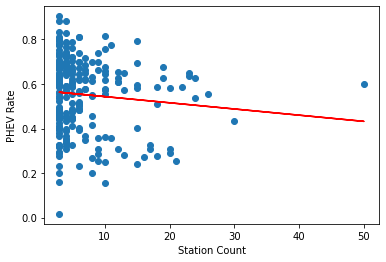

<AxesSubplot:>

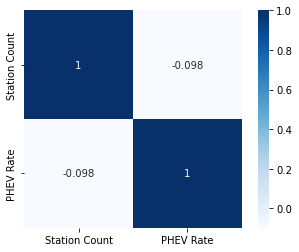

In [36]:
%matplotlib inline
linear_model_main(ev_car_station_pop_ny, 'Station Count', 'PHEV Rate')
corr_all = ev_car_station_pop_ny[['Station Count', 'PHEV Rate']].corr()
sns.heatmap(corr_all, cmap='Blues', square=True, annot=True)

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x = sm.add_constant(ev_car_station_pop_ny.iloc[:, 2:])
model = sm.OLS(ev_car_station_pop_ny['Station Count'], x)
#model = smf.OLS("ev_car_station_pop_ny['Station Count'] ～ ev_car_station_pop_ny.iloc[:, 2:]", data=)
result = model.fit()
result.summary()

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [38]:
cols = ev_car_station_pop_ny.iloc[:, 2:].columns.values.tolist()
for i in range(len(cols)):
    x = sm.add_constant(ev_car_station_pop_ny[cols])
    model = sm.OLS(ev_car_station_pop_ny['Station Count'], x)
    result = model.fit()
    pvalues = result.pvalues
    pvalues.drop('const', inplace=True)
    pmax = max(pvalues)
    if pmax > 0.1:
        ind = pvalues.idxmax()
        cols.remove(ind)
    else:
        result.summary()
result.summary()

/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/hyc/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Station Count   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     12.52
Date:                Tue, 03 May 2022   Prob (F-statistic):           0.000489
Time:                        00:48:45   Log-Likelihood:                -723.61
No. Observations:                 228   AIC:                             1451.
Df Residuals:                     226   BIC:                             1458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5877      0.555     10.065      0.000       4.494       6.682
Count          0.0003   8.48e-05      3.538      0.000       0.000       0.000
==============================================================================
Omnibus:                      157.955   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1494.339
Skew:                           2.670   Prob(JB):                         0.00
Kurtosis:                      14.348   Cond. No.                     9.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
ev_car_station_pop_ny.iloc[:, 2:]